##### 파이썬 데이터 시각화 seaborn example 따라하기
###### Youtube : https://www.youtube.com/watch?v=k_4SB4w8I8Q
###### seaborn gallary : https://seaborn.pydata.org/examples/index.html#

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid')

##### Part I. lineplot, regplot, lmplot 

In [2]:
##  seaborn 패키지에 내장되어 있는 앤스콤 데이터셋을 로딩 
df = sns.load_dataset('anscombe')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
dataset    44 non-null object
x          44 non-null float64
y          44 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [3]:
print(df.head())
print(df.tail())

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
   dataset     x      y
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [4]:
## dataset = I~IV의 4가지 데이터셋으로 구성되어 있음, 각각을 분리한다. 
df_1 = df[df['dataset'] == 'I']
df_2 = df[df['dataset'] == 'II']
df_3 = df[df['dataset'] == 'III']
df_4 = df[df['dataset'] == 'IV']

In [5]:
print(df_1.describe())
print(df_2.describe())
print(df_3.describe())
print(df_4.describe())

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12

In [6]:
print(df_1.corr())
print(df_2.corr())
print(df_3.corr())
print(df_4.corr())

          x         y
x  1.000000  0.816421
y  0.816421  1.000000
          x         y
x  1.000000  0.816237
y  0.816237  1.000000
          x         y
x  1.000000  0.816287
y  0.816287  1.000000
          x         y
x  1.000000  0.816521
y  0.816521  1.000000


[Text(0.5, 1.0, 'Dataset IV')]

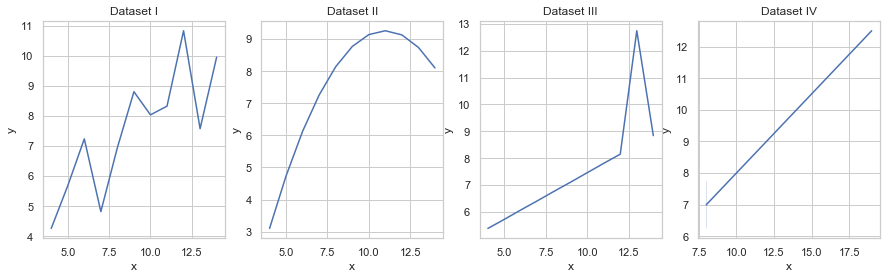

In [7]:
## 데이터셋 I~IV의 갯수와 평균, 표준편차, x&y의 상관계수까지 동일하지만, 시각화 해보면 전혀 다른 데이터임
## outlier 때문에 4개의 데이터가 모두 동일한 통계량을 갖게 되었다. 
figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(15,4)
sns.lineplot(data=df_1,x='x', y='y', ax=ax1)
sns.lineplot(data=df_2,x='x', y='y', ax=ax2)
sns.lineplot(data=df_3,x='x', y='y', ax=ax3)
sns.lineplot(data=df_4,x='x', y='y', ax=ax4)
ax1.set(title = 'Dataset I')
ax2.set(title = 'Dataset II')
ax3.set(title = 'Dataset III')
ax4.set(title = 'Dataset IV')

[Text(0.5, 1.0, 'Dataset IV')]

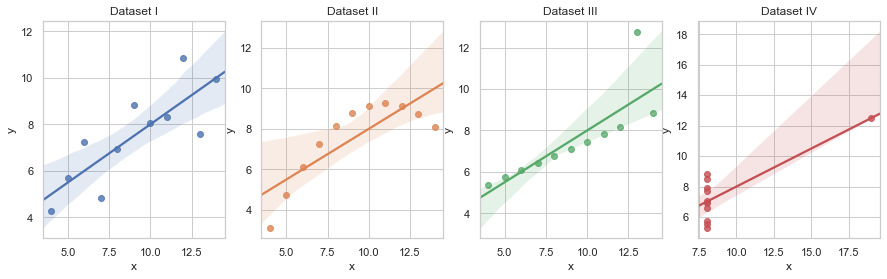

In [8]:
## regplot을 사용해 보자 
figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(15,4)
sns.regplot(data=df_1,x='x', y='y', ax=ax1)
sns.regplot(data=df_2,x='x', y='y', ax=ax2)
sns.regplot(data=df_3,x='x', y='y', ax=ax3)
sns.regplot(data=df_4,x='x', y='y', ax=ax4)
ax1.set(title = 'Dataset I')
ax2.set(title = 'Dataset II')
ax3.set(title = 'Dataset III')
ax4.set(title = 'Dataset IV')

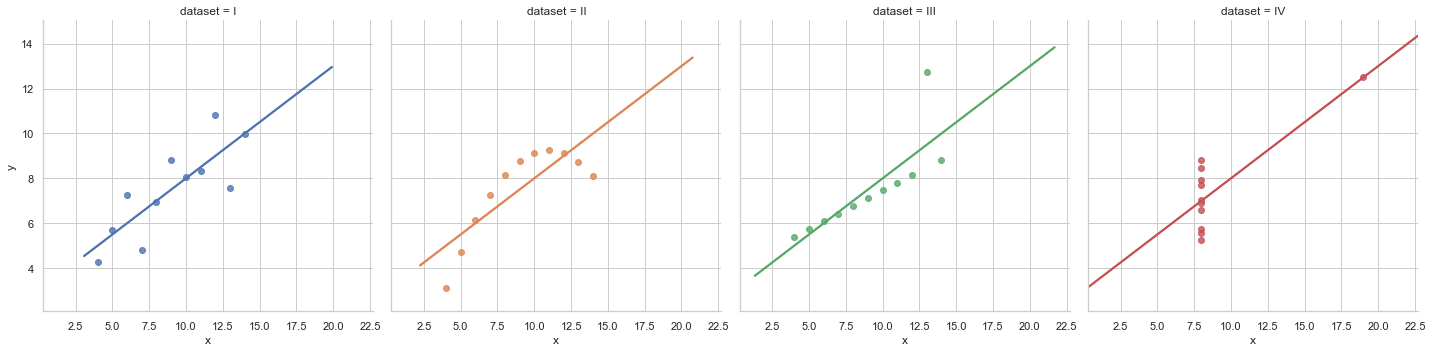

In [9]:
## lmplot은 hue, col 옵션을 사용할 수 있어서, 보다 코드를 간략화 할 수 있다. 
## ci는 신뢰구간을 의미하며 0부터 100까지의 값을 가짐. 만약 95라면 양극단의 5%값을 제외한 95%구간의 값을 표현
sns.lmplot(data=df, x='x', y='y', hue='dataset', col='dataset', ci=0)

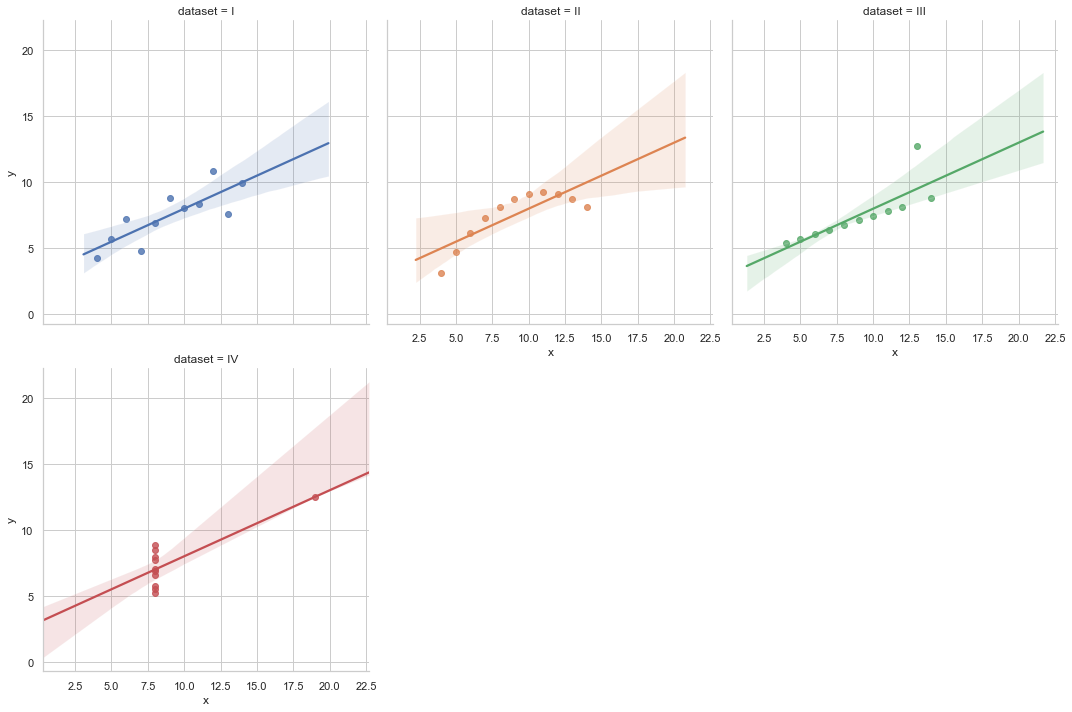

In [10]:
## col 옵션은 컬럼의 갯수를 지정한다. 
sns.lmplot(data=df, x='x', y='y', hue='dataset', col='dataset', col_wrap=3, ci=95)

##### Part II. barplot의 옵션들 
###### https://www.youtube.com/watch?v=MjYgXyS-cws

In [11]:
## 데이터 생성 
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
y2 = y1 - 5.5
y3 = np.random.normal(size=10)

print(x)
print(y1)
print(y2)
print(y3)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
[ 1  2  3  4  5  6  7  8  9 10]
[-4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5]
[ 1.23319813 -0.4753017  -0.34049271 -0.98385443  0.17622816  0.94921406
  0.47968426 -1.02260388  1.02448279  0.22052675]


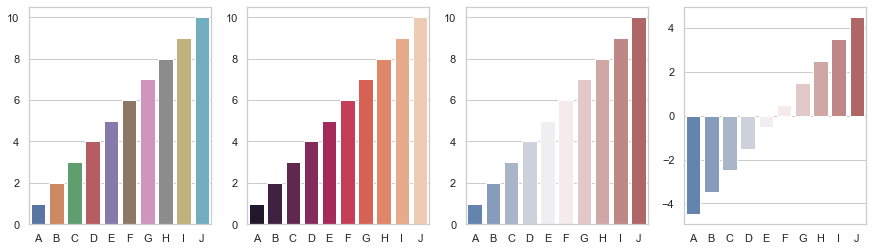

In [12]:
## palette 옵션 
#### 1) rocket : 진한것부터 점점 흐리게 표현 
#### 2) vlag : 0을 중심으로 +/- 쪽으로 점점 진하게, 음수와 양수의 색깔을 구별함 
figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(15,4)

sns.barplot(x=x, y=y1, ax=ax1) 
sns.barplot(x=x, y=y1, palette = 'rocket', ax=ax2) 
sns.barplot(x=x, y=y1, palette = 'vlag', ax=ax3) 
sns.barplot(x=x, y=y2, palette = 'vlag', ax=ax4) 

[Text(0.5, 1, 'Y2: from -4.5 ~ to +4.5')]

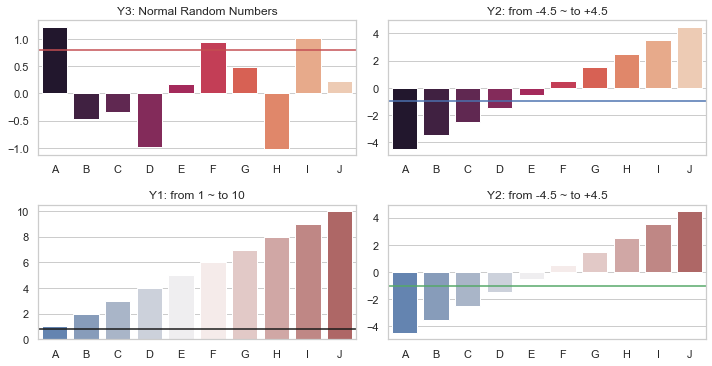

In [13]:
#### axhline옵션에서 특정값에 지시선을 표시할 수 있다. 
#### plt.tight_layout(h_pad=xx) 옵션으로 차트간 줄간격 설정 가능하다. 

figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10,5)

sns.barplot(x=x, y=y3, palette = 'rocket', ax=ax1)
sns.barplot(x=x, y=y2, palette = 'rocket', ax=ax2)
sns.barplot(x=x, y=y1, palette = 'vlag', ax=ax3)
sns.barplot(x=x, y=y2, palette = 'vlag', ax=ax4)

ax1.axhline(0.8, color="r")
ax2.axhline(-1, color="b")
ax3.axhline(0.8, color="k")
ax4.axhline(-1, color="g")

plt.tight_layout(h_pad=3)

ax1.set(title = 'Y3: Normal Random Numbers')
ax2.set(title = 'Y2: from -4.5 ~ to +4.5')
ax3.set(title = 'Y1: from 1 ~ to 10')
ax4.set(title = 'Y2: from -4.5 ~ to +4.5')

##### Part III. catplot vs. barplot
###### You Tube : https://www.youtube.com/watch?v=-kGzbA75V5I
###### seaborn gallary : https://seaborn.pydata.org/examples/grouped_barplot.html

In [14]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


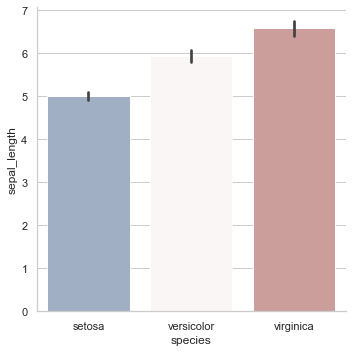

In [15]:
## kind=bar 일때는 sns.barplot과 동일한 결과를 나타낸다. 
sns.catplot(data=iris, x='species', y='sepal_length', kind='bar', palette = 'vlag')

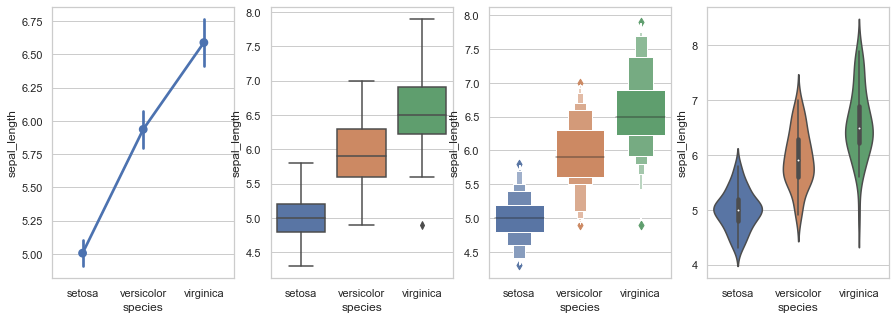

In [33]:
## 반면 catplot은 kind옵션을 통해 barplot에서 불가능한 다양한 차트를 만들 수 있다.  
#### kind = barplot, countplot, pointplot, boxplot, boxenplot, violinplot, stripplot
#### kind 옵션 대신 아예 catplot대신 boxplot등의 명령어를 사용할 수도 있다. 


figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(15,5)
sns.pointplot(data=iris, x='species', y='sepal_length', ax=ax1)
sns.boxplot(data=iris, x='species', y='sepal_length', ax=ax2)
sns.boxenplot(data=iris, x='species', y='sepal_length', ax=ax3)
sns.violinplot(data=iris, x='species', y='sepal_length', ax=ax4)

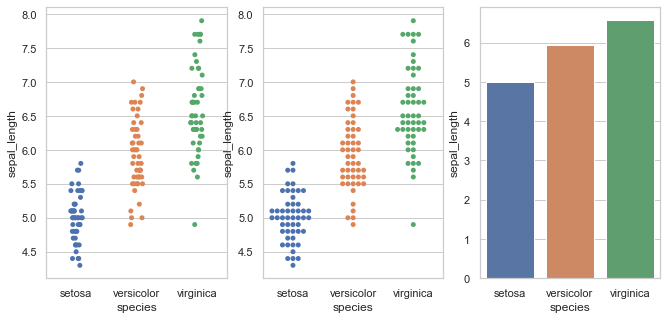

In [40]:
figure, (ax1,ax2,ax3) = plt.subplots(ncols=3)
figure.set_size_inches(11,5)
sns.stripplot(data=iris, x='species', y='sepal_length', ax=ax1)
sns.swarmplot(data=iris, x='species', y='sepal_length', ax=ax2)
sns.barplot(data=iris, x='species', y='sepal_length', ax=ax3, ci=0)